In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
image1 = cv2.imread('image1.jpg' , cv2.IMREAD_GRAYSCALE)
row_image1 , col_image1 = image1.shape


scaled_image1 = cv2.resize(image1,(0,0), fx=1.5, fy=1.5)


M = np.float32([[1, 0, 100], [0, 1, 100]])  # Translation matrix (100 pixels right, 100 pixels down)
translated_image1 = cv2.warpAffine(image1, M, (row_image1 , col_image1))


# rotate the image by 90 degree clockwise
img1_rotate_90 = cv2.rotate(image1, cv2.ROTATE_90_CLOCKWISE)

# Plot the original, scaled, translated, and rotated images
titles = ['Original', 'Scaled', 'Translated', 'Rotated']
images = [image1, scaled_image1, translated_image1, img1_rotate_90]



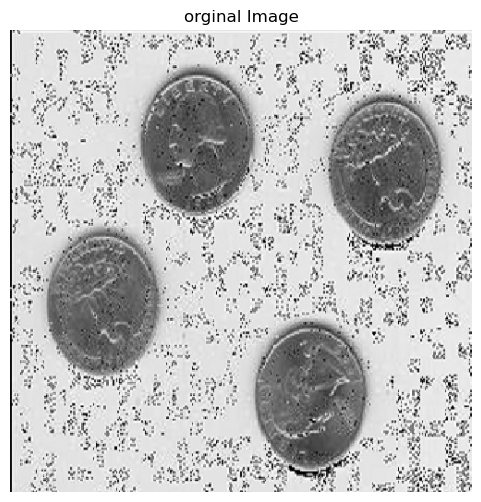

In [47]:
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('orginal Image')
plt.axis('off')
plt.show()

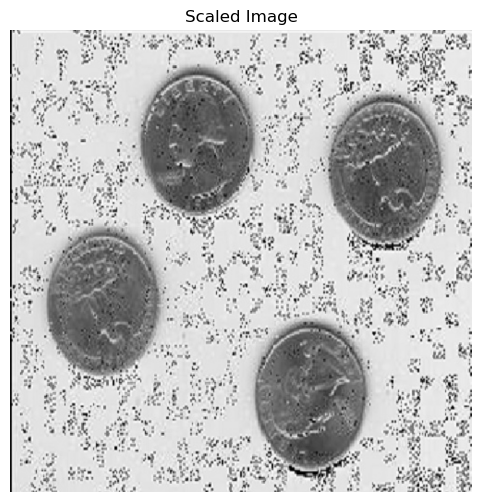

In [48]:
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(scaled_image1, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image')
plt.axis('off')
plt.show()

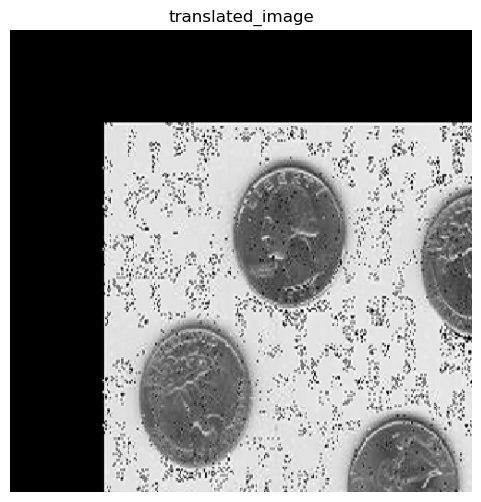

In [49]:
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(translated_image1, cv2.COLOR_BGR2RGB))
plt.title('translated_image')
plt.axis('off')
plt.show()

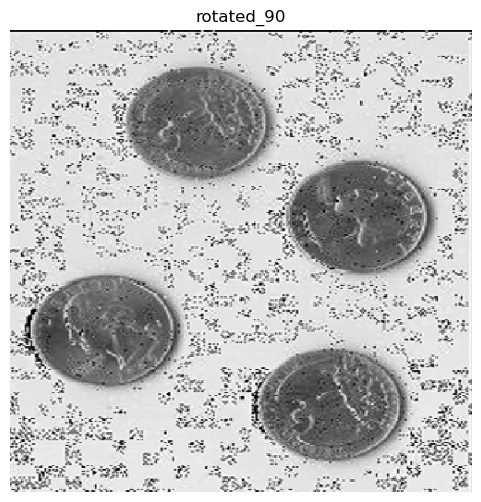

In [50]:
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img1_rotate_90, cv2.COLOR_BGR2RGB))
plt.title('rotated_90')
plt.axis('off')
plt.show()

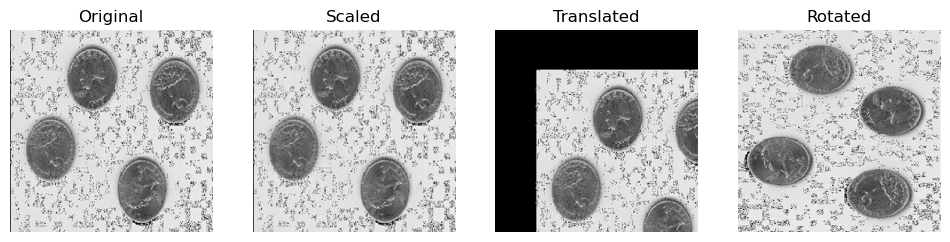

In [51]:
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()


در شکل های بالا چون پلات ها سایزشون یکسانه و کل سایز رو عکس میپوشونه شاید متوجه اسکیل شدن نشویم ولی اسکیل شده است.با مقایسه دو سلول زیر میتوانیم ببینیم اندازه انها فرق کرده است. 

In [56]:
cv2.imshow("Scaled", scaled_image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
cv2.imshow("orginal", image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

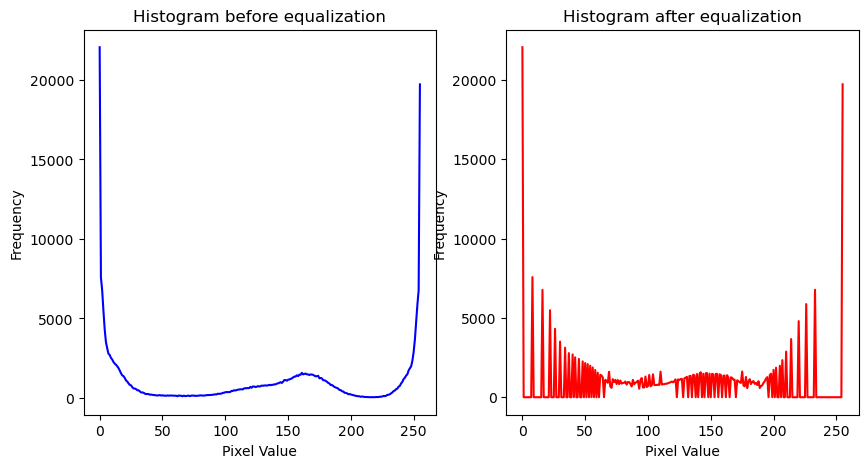

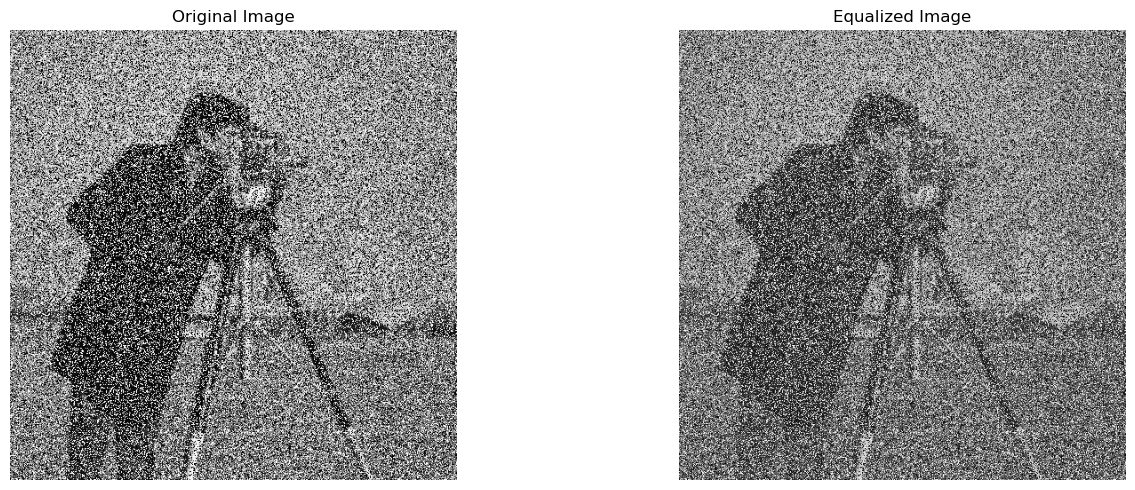

In [54]:
image2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

hist_before = cv2.calcHist([image2], [0], None, [256], [0, 256])
equalized_image = cv2.equalizeHist(image2)
hist_after = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist_before, color='blue')
plt.title('Histogram before equalization')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.plot(hist_after, color='red')
plt.title('Histogram after equalization')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

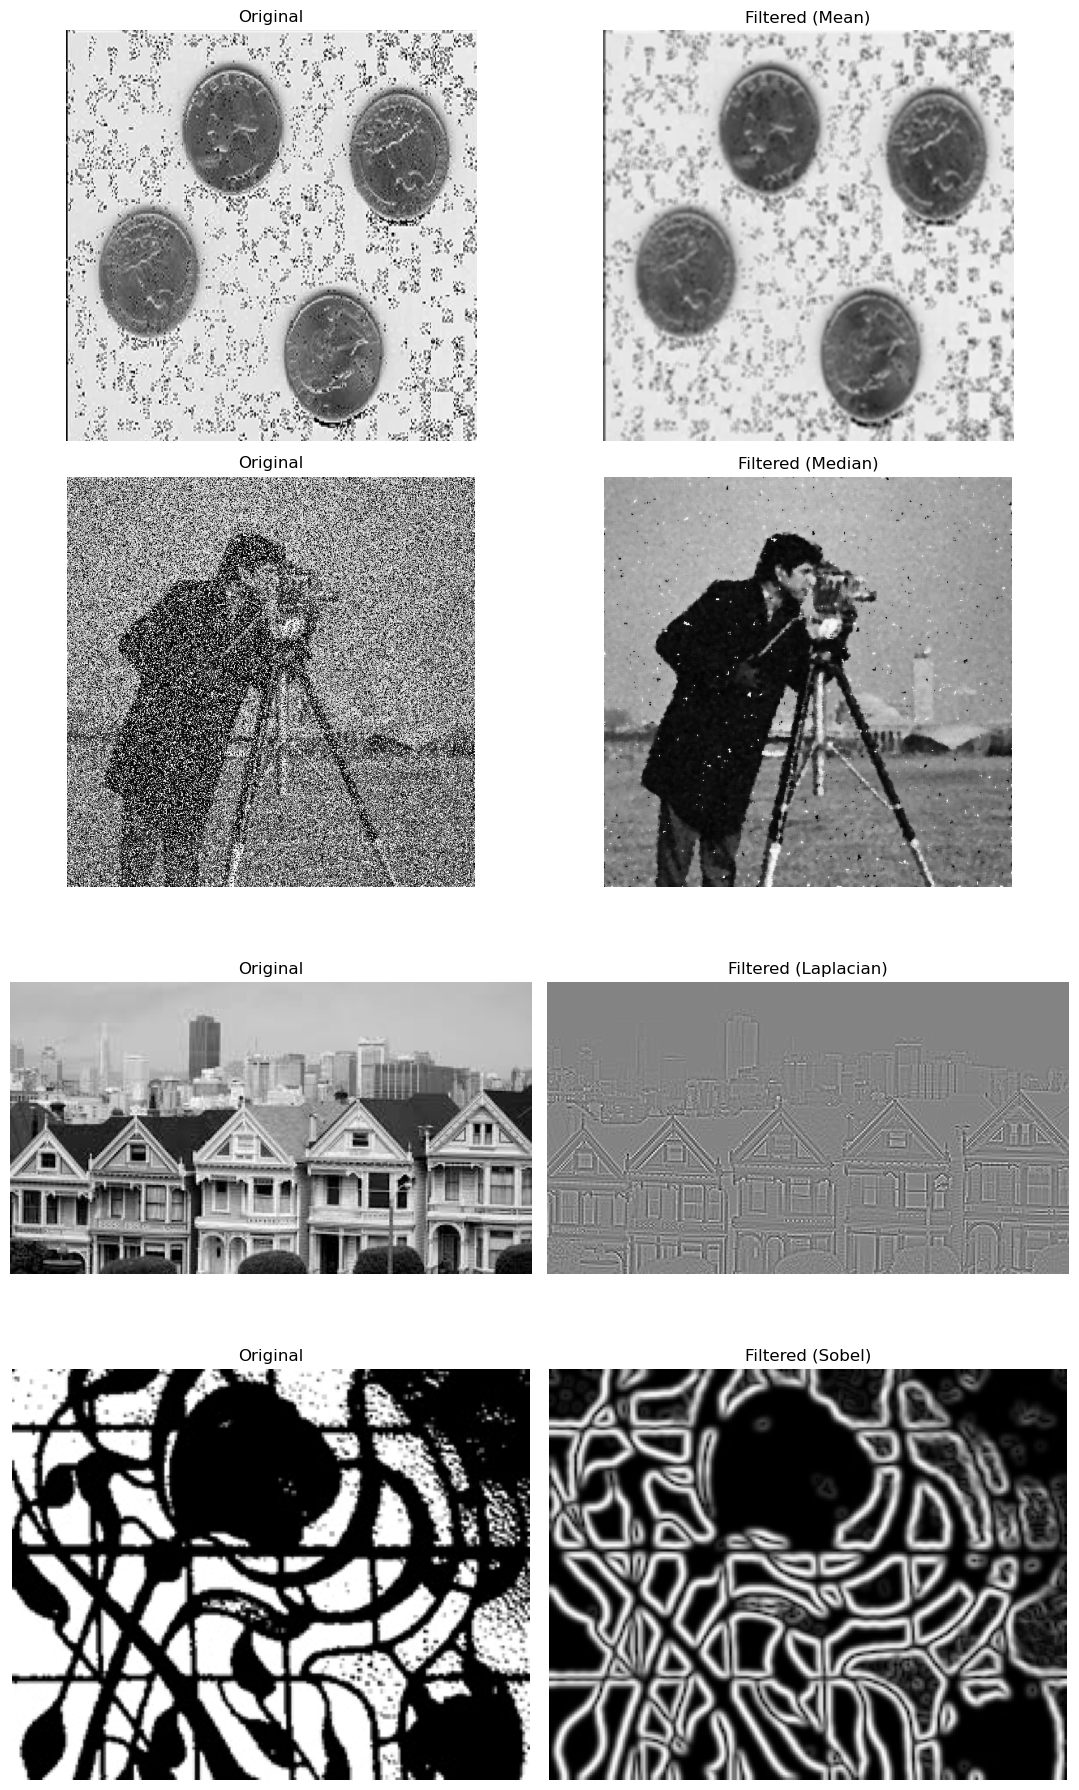

In [55]:
image3 = cv2.imread('Image3.jpg', cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread('Image4.jpg', cv2.IMREAD_GRAYSCALE)

filter_sizes = {
    'a': (5, 5),
    'b': (5, 5),
    'c': (5, 5),
    'd': 7  
}

filter_types = {
    'a': 'mean',
    'b': 'median',
    'c': 'laplacian',
    'd': 'sobel'
}

plt.figure(figsize=(27, 18))
titles = ['Original', 'Filtered (Mean)', 'Filtered (Median)', 'Filtered (Laplacian)', 'Filtered (Sobel)']
images = [image1, image2, image3, image4]

for idx, (key, size) in enumerate(filter_sizes.items()):
    plt.subplot(4, 5, idx*5 + 1)
    plt.imshow(images[idx], cmap='gray')
    plt.title(titles[0])
    plt.axis('off')

    filter_type = filter_types[key]
    if filter_type == 'mean':
        # mean filter
        filtered_image = cv2.blur(images[idx], size)
    elif filter_type == 'median':
        # median filter
        filtered_image = cv2.medianBlur(images[idx], 5)
    elif filter_type == 'laplacian':
        # Laplacian filter
        filtered_image = cv2.Laplacian(images[idx], cv2.CV_64F)
    elif filter_type == 'sobel':
        # Sobel filter
        filtered_image_x = cv2.Sobel(images[idx], cv2.CV_64F, 1, 0, ksize=size)
        filtered_image_y = cv2.Sobel(images[idx], cv2.CV_64F, 0, 1, ksize=size)
        filtered_image = np.sqrt(filtered_image_x ** 2 + filtered_image_y ** 2)
    
    plt.subplot(4, 5, idx*5 + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(titles[idx+1])
    plt.axis('off')

plt.tight_layout()
plt.show()
